In [ ]:
!rm -r /content/dataset

In [20]:
!ls

shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory


In [14]:
import json
import os
import requests
import random
from PIL import Image
from sklearn.model_selection import train_test_split

In [ ]:
!unzip dataset_yolov9.zip

In [2]:
!mv content/dataset .


In [ ]:
train: /content/dataset/images/train
val: /content/dataset/images/val
nc: 8
names: ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i']


# YOLO_V9

In [ ]:
!pip install ultralytics wandb weave opencv-python requests pillow

In [21]:
from PIL import Image
import glob

image_paths = glob.glob('/content/dataset/images/train/*.png')

for image_path in image_paths:
    with Image.open(image_path) as img:
        if img.format == 'GIF':
            img.save(image_path, format='PNG')

In [22]:
from PIL import Image
import glob

image_paths = glob.glob('/content/dataset/images/train/*.png')

for image_path in image_paths:
    with Image.open(image_path) as img:
        if img.format == 'GIF':
            img.save(image_path, format='PNG')

In [24]:
image_paths = glob.glob('/content/dataset/images/val/*.png')

for image_path in image_paths:
    with Image.open(image_path) as img:
        if img.format == 'GIF':
            img.save(image_path, format='PNG')

In [ ]:
model = YOLO("yolov9c.pt")
model_path = "yolov9c_finetunedv2.pt"


In [ ]:
from ultralytics import YOLO
import wandb

# Load a pretrained YOLOv11 model
model = YOLO("yolo11x.pt")
model_path = "yolov11x_finetunedv2.pt"

results = model.train(
    data="./data.yaml",
    epochs=150,
    imgsz=608,
    project="yolo11x_training",  # wandb project name
    name="yolov11x_finetune"     # wandb run name
)

# Save the fine-tuned model
model.save(model_path)
wandb.init("yolo11x_training")
wandb.log_model(model_path)
wandb.finish()

Ultralytics 8.3.23 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11x.pt, data=./data.yaml, epochs=150, time=None, patience=100, batch=16, imgsz=608, save=True, save_period=-1, cache=False, device=None, workers=8, project=yolo11x_training, name=yolov11x_finetune, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, 


train: Scanning /content/dataset/labels/train.cache... 1735 images, 341 backgrounds, 18 corrupt: 100%|██████████| 1735/1735 [00:00<?, ?it/s]

train: WARNING ⚠️ /content/dataset/images/train/C0JM04464D_fig2.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0026]
train: WARNING ⚠️ /content/dataset/images/train/C3LC50999K_fig2.png: 1 duplicate labels removed
train: WARNING ⚠️ /content/dataset/images/train/ncomms10603_fig4.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0015      1.0015]
train: WARNING ⚠️ /content/dataset/images/train/ncomms14210_fig1.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0015]
train: WARNING ⚠️ /content/dataset/images/train/ncomms6229_fig3.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0015      1.0015]
train: WARNING ⚠️ /content/dataset/images/train/ncomms8358_fig1.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0015      1.0015]
train: WARNING ⚠️ /content/dataset/images/train/ncomms9711_fig4.png: ignoring cor



val: Scanning /content/dataset/labels/val.cache... 952 images, 186 backgrounds, 14 corrupt: 100%|██████████| 952/952 [00:00<?, ?it/s]

val: WARNING ⚠️ /content/dataset/images/val/C0CE00988A_fig4.png: 1 duplicate labels removed
val: WARNING ⚠️ /content/dataset/images/val/ncomms10603_fig3.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0015      1.0015      1.0015]
val: WARNING ⚠️ /content/dataset/images/val/ncomms10603_fig7.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0015]
val: WARNING ⚠️ /content/dataset/images/val/ncomms4801_fig2.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0015]
val: WARNING ⚠️ /content/dataset/images/val/ncomms9711_fig6.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0015]
val: WARNING ⚠️ /content/dataset/images/val/nn203661n_fig4.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0034]
val: WARNING ⚠️ /content/dataset/images/val/s41467-017-00332-x_fig3.png: ignoring corrupt image/label: non-normalized 

Plotting labels to yolo11x_training/yolov11x_finetune/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000833, momentum=0.9) with parameter groups 167 weight(decay=0.0), 174 weight(decay=0.0005), 173 bias(decay=0.0)


Exception ignored in: <function tqdm.__del__ at 0x7c3093640af0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/tqdm/std.py", line 1148, in __del__
    self.close()
  File "/usr/local/lib/python3.10/dist-packages/tqdm/std.py", line 1277, in close
    if self.last_print_t < self.start_t + self.delay:
AttributeError: 'TQDM' object has no attribute 'last_print_t'


TensorBoard: model graph visualization added ✅
Image sizes 608 train, 608 val
Using 8 dataloader workers
Logging results to yolo11x_training/yolov11x_finetune
Starting training for 150 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/150      15.4G     0.6293       2.24       1.15         21        608: 100%|██████████| 108/108 [02:09<00:00,  1.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:19<00:00,  1.58it/s]


                   all        938       3261      0.322      0.278     0.0787     0.0626

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/150      15.2G     0.6179      1.899      1.123         34        608: 100%|██████████| 108/108 [02:06<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:18<00:00,  1.60it/s]


                   all        938       3261      0.322      0.228      0.061     0.0438

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/150      15.2G     0.6185      1.857      1.123         33        608: 100%|██████████| 108/108 [02:05<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:18<00:00,  1.61it/s]


                   all        938       3261      0.221       0.43      0.145      0.117

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/150      15.4G     0.5884      1.829      1.104         31        608: 100%|██████████| 108/108 [02:05<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:19<00:00,  1.57it/s]


                   all        938       3261      0.227      0.349      0.116     0.0954

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/150      15.4G     0.5326      1.764      1.075         35        608: 100%|██████████| 108/108 [02:05<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:18<00:00,  1.60it/s]


                   all        938       3261      0.336      0.403      0.117     0.0968

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/150      15.4G     0.5209      1.735      1.052         42        608: 100%|██████████| 108/108 [02:05<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:18<00:00,  1.61it/s]


                   all        938       3261       0.25      0.376      0.152      0.135

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/150      15.4G     0.4971      1.707      1.037         35        608: 100%|██████████| 108/108 [02:05<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:18<00:00,  1.60it/s]


                   all        938       3261      0.264      0.368      0.174      0.157

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/150      15.4G     0.4698      1.676      1.022         37        608: 100%|██████████| 108/108 [02:05<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:18<00:00,  1.61it/s]


                   all        938       3261      0.258      0.573      0.205      0.189

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/150      15.4G     0.4607       1.66      1.014         38        608: 100%|██████████| 108/108 [02:05<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:18<00:00,  1.63it/s]

                   all        938       3261      0.391      0.429      0.199      0.177



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/150      15.4G     0.4328      1.608     0.9958         18        608: 100%|██████████| 108/108 [02:05<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:18<00:00,  1.61it/s]


                   all        938       3261      0.115       0.49      0.158      0.142

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/150      15.4G     0.4296       1.61      1.002         24        608: 100%|██████████| 108/108 [02:05<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:18<00:00,  1.62it/s]

                   all        938       3261      0.106      0.511      0.168      0.155



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/150      15.4G       0.42      1.598     0.9915         34        608: 100%|██████████| 108/108 [02:05<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:18<00:00,  1.62it/s]

                   all        938       3261      0.137      0.503      0.191      0.174



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/150      15.4G     0.4155      1.578     0.9929         22        608: 100%|██████████| 108/108 [02:05<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:18<00:00,  1.62it/s]

                   all        938       3261      0.294      0.493      0.245       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/150      15.4G     0.4079      1.548     0.9879         38        608: 100%|██████████| 108/108 [02:05<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:18<00:00,  1.62it/s]


                   all        938       3261      0.136      0.341      0.177      0.147

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/150      15.5G     0.4025      1.521     0.9839         46        608: 100%|██████████| 108/108 [02:05<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:18<00:00,  1.63it/s]

                   all        938       3261      0.209      0.554      0.281      0.265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/150      15.4G     0.3956      1.523     0.9818         33        608: 100%|██████████| 108/108 [02:05<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:18<00:00,  1.62it/s]


                   all        938       3261      0.239      0.521      0.314      0.268

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/150      15.4G     0.3943      1.514     0.9802         25        608: 100%|██████████| 108/108 [02:05<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:18<00:00,  1.62it/s]


                   all        938       3261      0.252      0.526      0.312      0.297

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/150      15.4G     0.3878       1.47     0.9772         41        608: 100%|██████████| 108/108 [02:05<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:18<00:00,  1.62it/s]


                   all        938       3261      0.214      0.526      0.311      0.294

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/150      15.4G     0.3835      1.429     0.9706         53        608: 100%|██████████| 108/108 [02:05<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:18<00:00,  1.62it/s]


                   all        938       3261      0.341      0.576      0.439      0.414

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/150      15.4G     0.3703      1.352     0.9694         27        608: 100%|██████████| 108/108 [02:05<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:18<00:00,  1.62it/s]

                   all        938       3261       0.36       0.58      0.461      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/150      15.4G     0.3673      1.295     0.9615         42        608: 100%|██████████| 108/108 [02:05<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:18<00:00,  1.62it/s]

                   all        938       3261      0.485      0.608       0.52      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/150      15.4G     0.3671      1.273     0.9618         31        608: 100%|██████████| 108/108 [02:05<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:18<00:00,  1.62it/s]

                   all        938       3261      0.516      0.647      0.588      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/150      15.4G     0.3591      1.241     0.9576         36        608: 100%|██████████| 108/108 [02:05<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:18<00:00,  1.62it/s]


                   all        938       3261      0.462      0.598      0.558      0.523

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/150      15.5G     0.3649      1.244     0.9645         33        608: 100%|██████████| 108/108 [02:05<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:18<00:00,  1.62it/s]

                   all        938       3261      0.592      0.634      0.653      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/150      15.4G     0.3549      1.184     0.9595         47        608: 100%|██████████| 108/108 [02:05<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:18<00:00,  1.63it/s]

                   all        938       3261      0.513      0.619      0.568      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/150      15.4G     0.3467      1.163     0.9529         34        608: 100%|██████████| 108/108 [02:05<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:18<00:00,  1.62it/s]


                   all        938       3261      0.657      0.654      0.673       0.63

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/150      15.4G     0.3528      1.136      0.953         36        608: 100%|██████████| 108/108 [02:05<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:18<00:00,  1.63it/s]

                   all        938       3261      0.634      0.654      0.664      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/150      15.4G     0.3522      1.138     0.9542         41        608: 100%|██████████| 108/108 [02:05<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:18<00:00,  1.62it/s]

                   all        938       3261      0.606      0.691      0.674       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/150      15.4G     0.3386      1.082     0.9458         49        608: 100%|██████████| 108/108 [02:05<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:18<00:00,  1.62it/s]

                   all        938       3261        0.6      0.679      0.674      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/150      15.4G     0.3347      1.083     0.9427         38        608: 100%|██████████| 108/108 [02:05<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:18<00:00,  1.63it/s]

                   all        938       3261      0.636      0.725      0.727      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/150      15.4G     0.3407      1.081     0.9457         41        608: 100%|██████████| 108/108 [02:05<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:18<00:00,  1.62it/s]

                   all        938       3261      0.662       0.73      0.743      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/150      15.4G      0.332      1.045     0.9385         41        608: 100%|██████████| 108/108 [02:05<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:18<00:00,  1.63it/s]

                   all        938       3261      0.779      0.674      0.754      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/150      15.4G     0.3205      1.014     0.9367         34        608: 100%|██████████| 108/108 [02:05<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:18<00:00,  1.63it/s]

                   all        938       3261      0.793      0.723      0.788      0.755



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/150      15.4G     0.3271      1.005     0.9376         37        608: 100%|██████████| 108/108 [02:05<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:18<00:00,  1.62it/s]

                   all        938       3261      0.688      0.785      0.805       0.77



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/150      15.4G     0.3261     0.9896     0.9296         35        608: 100%|██████████| 108/108 [02:05<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:18<00:00,  1.62it/s]

                   all        938       3261      0.782      0.742      0.813      0.783



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/150      15.4G      0.317     0.9751     0.9272         48        608: 100%|██████████| 108/108 [02:05<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:18<00:00,  1.62it/s]

                   all        938       3261      0.697      0.785      0.788      0.757



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/150      15.4G     0.3258     0.9669     0.9351         33        608: 100%|██████████| 108/108 [02:05<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:18<00:00,  1.62it/s]

                   all        938       3261      0.763      0.769       0.81      0.769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/150      15.4G     0.3177     0.9426     0.9243         44        608: 100%|██████████| 108/108 [02:05<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:18<00:00,  1.62it/s]

                   all        938       3261      0.778      0.793      0.839      0.794



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/150      15.4G     0.3135     0.9276     0.9229         33        608: 100%|██████████| 108/108 [02:05<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:18<00:00,  1.62it/s]

                   all        938       3261      0.784      0.768      0.821      0.765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/150      15.4G      0.316     0.9109     0.9214         60        608: 100%|██████████| 108/108 [02:05<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:18<00:00,  1.62it/s]

                   all        938       3261      0.776      0.765      0.832      0.775



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/150      15.4G     0.3163     0.9027     0.9241         32        608: 100%|██████████| 108/108 [02:05<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:18<00:00,  1.62it/s]

                   all        938       3261      0.759      0.774      0.795      0.758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/150      15.4G     0.3097     0.9046     0.9227         50        608: 100%|██████████| 108/108 [02:05<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:18<00:00,  1.62it/s]

                   all        938       3261      0.768      0.766      0.821      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/150      15.4G     0.3077     0.8945     0.9267         32        608: 100%|██████████| 108/108 [02:05<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:18<00:00,  1.61it/s]

                   all        938       3261      0.829      0.765      0.851      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/150      15.4G     0.3092     0.8661     0.9214         33        608: 100%|██████████| 108/108 [02:05<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:18<00:00,  1.62it/s]

                   all        938       3261      0.823      0.772      0.842       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/150      15.4G      0.309     0.8682     0.9229         39        608: 100%|██████████| 108/108 [02:05<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:18<00:00,  1.63it/s]

                   all        938       3261      0.803      0.795      0.851      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/150      15.4G     0.2969     0.8422     0.9135         41        608: 100%|██████████| 108/108 [02:05<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:18<00:00,  1.62it/s]

                   all        938       3261      0.826      0.817      0.868       0.83



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/150      15.4G     0.3091     0.8585     0.9289         41        608: 100%|██████████| 108/108 [02:05<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:18<00:00,  1.62it/s]

                   all        938       3261      0.818      0.823      0.863      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/150      15.4G      0.294     0.8153     0.9121         42        608: 100%|██████████| 108/108 [02:05<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:18<00:00,  1.62it/s]

                   all        938       3261      0.848      0.796      0.866       0.83



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/150      15.4G     0.2933      0.853     0.9115         19        608: 100%|██████████| 108/108 [02:05<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:18<00:00,  1.61it/s]

                   all        938       3261      0.818      0.817      0.863      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/150      15.4G     0.2929     0.8299     0.9106         34        608: 100%|██████████| 108/108 [02:05<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:18<00:00,  1.62it/s]

                   all        938       3261      0.843      0.807      0.875      0.844



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/150      15.4G     0.2958     0.8251     0.9138         39        608: 100%|██████████| 108/108 [02:05<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:18<00:00,  1.63it/s]

                   all        938       3261      0.842      0.808      0.879      0.845



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/150      15.4G     0.2887     0.7931     0.9087         28        608: 100%|██████████| 108/108 [02:05<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:18<00:00,  1.62it/s]

                   all        938       3261       0.84      0.838      0.904      0.871



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/150      15.4G      0.288     0.7816     0.9095         39        608: 100%|██████████| 108/108 [02:05<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:18<00:00,  1.62it/s]

                   all        938       3261      0.861       0.83      0.896      0.866



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/150      15.4G      0.288      0.789     0.9131         44        608: 100%|██████████| 108/108 [02:05<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:18<00:00,  1.62it/s]

                   all        938       3261      0.856       0.85      0.905      0.871



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/150      15.4G     0.2912     0.7742     0.9132         23        608: 100%|██████████| 108/108 [02:05<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:18<00:00,  1.62it/s]

                   all        938       3261      0.848      0.833      0.902      0.869



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/150      15.4G     0.2887     0.7778     0.9097         33        608: 100%|██████████| 108/108 [02:05<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:18<00:00,  1.62it/s]

                   all        938       3261      0.822      0.841      0.883      0.852



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/150      15.4G      0.288     0.7715     0.9075         38        608: 100%|██████████| 108/108 [02:05<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  43%|████▎     | 13/30 [00:06<00:10,  1.64it/s]

In [ ]:
metrics = model.val(
    data="./data.yaml",
    batch=16,
    imgsz=640,
    conf=0.001,
    iou=0.65,
    save_json=True,
    plots=True
)

In [64]:
metrics = model.val(
    data="./data.yaml",
    batch=16,
    imgsz=640,
    conf=0.001,
    iou=0.65,
    save_json=True,
    plots=True
)


Ultralytics 8.3.21 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


val: Scanning /content/dataset/labels/val.cache... 1303 images, 0 backgrounds, 19 corrupt: 100%|██████████| 1303/1303 [00:00<?, ?it/s]

val: WARNING ⚠️ /content/dataset/images/val/C0CE00988A_fig4.png: 1 duplicate labels removed
val: WARNING ⚠️ /content/dataset/images/val/ncomms10603_fig3.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0015      1.0015      1.0015]
val: WARNING ⚠️ /content/dataset/images/val/ncomms10603_fig4.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0015      1.0015]
val: WARNING ⚠️ /content/dataset/images/val/ncomms10603_fig7.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0015]
val: WARNING ⚠️ /content/dataset/images/val/ncomms4801_fig2.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0015]
val: WARNING ⚠️ /content/dataset/images/val/ncomms9711_fig4.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0015      1.0015]
val: WARNING ⚠️ /content/dataset/images/val/ncomms9711_fig6.png: ignoring corrupt image/labe


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:52<00:00,  1.53it/s]


                   all       1284       5594      0.703      0.792      0.803      0.772
                     a       1250       1257      0.866      0.959      0.961      0.931
                     b       1246       1250      0.789      0.934      0.938      0.907
                     c       1032       1037      0.754      0.884      0.891      0.852
                     d        837        839      0.783      0.894      0.918      0.884
                     e        485        487      0.691      0.762      0.799      0.776
                     f        378        378      0.816      0.847      0.871      0.841
                     g        169        170      0.642      0.735       0.74      0.708
                     h        118        119      0.643      0.832      0.819      0.768
                     i         56         57      0.339      0.279       0.29      0.283
Speed: 0.2ms preprocess, 3.4ms inference, 0.0ms loss, 1.0ms postprocess per image
Saving runs/detect/val/predi

In [66]:
model_path = "runs/train/yolov9_finetune/weights/best.pt"
model = YOLO("yolov9c_finetunedv2.pt")

In [127]:
image_path = "/content/acs.macromol.5b02638_page_2_img_2.png"

In [128]:

# Run inference with adjusted NMS parameters
results = model.predict(
    source=image_path,
    imgsz=640,
    conf=0.25,
    iou=0.45,
    max_det=100,          # Maximum number of detections per image
    agnostic_nms=False,   # Use class-aware NMS
)


image 1/1 /content/acs.macromol.5b02638_page_2_img_2.png: 288x640 1 a, 48.3ms
Speed: 2.1ms preprocess, 48.3ms inference, 1.6ms postprocess per image at shape (1, 3, 288, 640)



image 1/1 /content/acs.macromol.5b02638_page_2_img_2.png: 288x640 1 a, 10.8ms
Speed: 1.8ms preprocess, 10.8ms inference, 1.4ms postprocess per image at shape (1, 3, 288, 640)


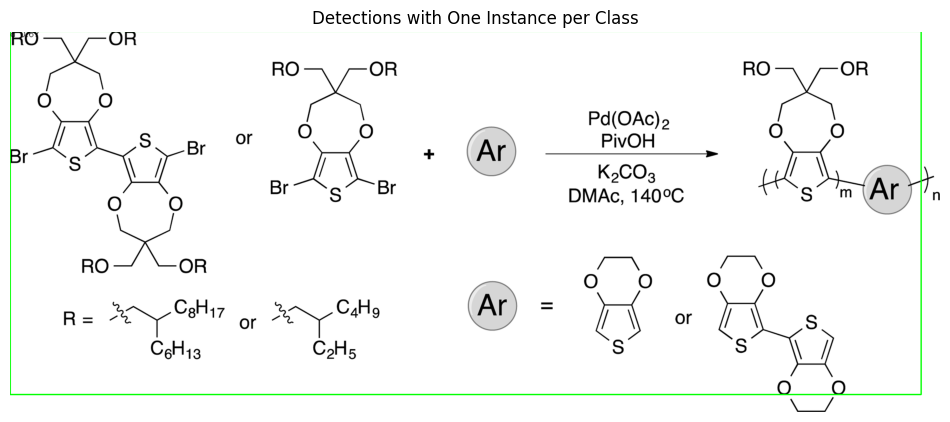

In [129]:
import cv2
import matplotlib.pyplot as plt

results = model.predict(
    source=image_path,
    imgsz=640,
    conf=0.25,
    iou=0.45,
    max_det=100,
    agnostic_nms=False,  # Use class-aware NMS
)

# Step 3: Process results to keep only one detection per class
for result in results:
    detections_per_class = {}
    for box in result.boxes:
        cls_id = int(box.cls[0])
        conf = box.conf[0]
        # Keep the detection with the highest confidence for each class
        if cls_id not in detections_per_class or conf > detections_per_class[cls_id].conf[0]:
            detections_per_class[cls_id] = box

    # Get the final detections
    final_detections = list(detections_per_class.values())

    # Step 4: Load the original image
    # Note: OpenCV reads images in BGR format by default
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error: Unable to load image at {image_path}")
        continue  # Skip if the image cannot be loaded

    # Step 5: Draw the final detections on the image
    for box in final_detections:
        x1, y1, x2, y2 = box.xyxy[0]
        conf = box.conf[0]
        cls_id = int(box.cls[0])
        class_name = model.names[cls_id]

        # Convert coordinates to integers
        x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)

        # Draw the bounding box
        color = (0, 255, 0)  # Green color in BGR
        cv2.rectangle(image, (x1, y1), (x2, y2), color, 2)

        # Prepare label with class name and confidence
        label = f"{class_name} {conf:.2f}"

        # Calculate text size
        (text_width, text_height), baseline = cv2.getTextSize(
            label, cv2.FONT_HERSHEY_SIMPLEX, 0.6, 1
        )

        # Set the text background rectangle coordinates
        text_bg_x1 = x1
        text_bg_y1 = y1 - text_height - baseline
        text_bg_x2 = x1 + text_width
        text_bg_y2 = y1

        # Draw the text background rectangle
        cv2.rectangle(
            image,
            (text_bg_x1, text_bg_y1),
            (text_bg_x2, text_bg_y2),
            color,
            -1  # Filled rectangle
        )

        # Put the text on the image
        cv2.putText(
            image,
            label,
            (x1, y1 + 2*baseline),
            cv2.FONT_HERSHEY_SIMPLEX,
            0.6,
            (0, 0, 0),  # Black color for text
            1,
            cv2.LINE_AA
        )

    # Step 6: Convert the image from BGR to RGB for matplotlib
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Step 7: Display the image using matplotlib
    plt.figure(figsize=(12, 8))
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.title('Detections with One Instance per Class')
    plt.show()

In [130]:
# Process results to keep only one detection per class
for result in results:
    detections_per_class = {}
    for box in result.boxes:
        cls_id = int(box.cls[0])
        conf = box.conf[0]

        # If class not seen before or current confidence is higher, update the detection
        if cls_id not in detections_per_class or conf > detections_per_class[cls_id].conf[0]:
            detections_per_class[cls_id] = box

    # 'detections_per_class' now contains at most one detection per class
    final_detections = list(detections_per_class.values())

    # Process or display the final detections
    for box in final_detections:
        x1, y1, x2, y2 = box.xyxy[0]
        conf = box.conf[0]
        cls_id = int(box.cls[0])
        class_name = model.names[cls_id]
        print(f"Detected {class_name} with confidence {conf:.2f} at [{x1:.0f}, {y1:.0f}, {x2:.0f}, {y2:.0f}]")


Detected a with confidence 0.67 at [0, 1, 1960, 781]


In [95]:
results = model.predict(
    source=image_path,
    imgsz=640,        # Image size, should match training size
    conf=0.25,        # Confidence threshold
    save=True         # Save the annotated image
)


image 1/1 /content/dataset/images/val/s41598-017-14713-1_fig1.png: 640x576 1 a, 1 b, 2 cs, 1 d, 1 f, 11.2ms
Speed: 2.9ms preprocess, 11.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 576)
Results saved to runs/detect/predict


In [74]:
#  Iterate over the results
for result in results:
    boxes = result.boxes  # Bounding boxes
    for box in boxes:
        # Bounding box coordinates (xyxy format)
        x1, y1, x2, y2 = box.xyxy[0]
        # Confidence score
        conf = box.conf[0]
        # Class ID
        cls_id = int(box.cls[0])
        # Class name
        class_name = model.names[cls_id]
        print(f"Detected {class_name} with confidence {conf:.2f} at [{x1:.0f}, {y1:.0f}, {x2:.0f}, {y2:.0f}]")

Detected b with confidence 0.99 at [346, 2, 685, 338]
Detected d with confidence 0.99 at [347, 351, 685, 689]
Detected c with confidence 0.98 at [0, 351, 337, 689]
Detected a with confidence 0.98 at [0, 2, 337, 338]


In [63]:
from ultralytics import YOLO
import requests
from PIL import Image
from io import BytesIO
import os
import wandb
import weave


# Initialize Weave and wandb with the same project name
project_name = "yolo_training"
weave.init(project_name)
run = wandb.init(project=project_name)

#kvriza/yolo_training/run_tmm1h6ky_model:v0
# Use the specified artifact
artifact = run.use_artifact('kvriza/yolo_training/run_adexybdt_model:v0', type='model')
artifact_dir = artifact.download()


# Define the path to the downloaded model
model_path = os.path.join(artifact_dir, "best.pt")


# Load the pretrained YOLOv9 model
model = YOLO(model_path)


# Function to run inference on a single image
@weave.op
def run_inference(image: Image.Image) -> dict:
    try:
        # Save the image locally for prediction
        local_image_path = 'temp_image.jpg'
        image.save(local_image_path)


        # Run the YOLO model on the image with adjusted NMS threshold
        results = model.predict(local_image_path, conf=0.7, iou=0.2)


        # Draw bounding boxes on the image and save the result
        results[0].save(local_image_path)
        result_image = Image.open(local_image_path)


        # Extract predictions
        predictions = []
        for box in results[0].boxes:
            class_id = int(box.cls)
            class_name = results[0].names[class_id]
            confidence = box.conf.item()
            coordinates = box.xyxy.tolist()
            predictions.append({
                'class': class_name,
                'confidence': confidence,
                'coordinates': coordinates
            })


        # Prepare the results
        result_data = {
            'result_image': result_image,
            'predictions': predictions
        }


        return result_data
    except Exception as e:
        return {'error': str(e)}


# Download the image from the URL
image_url = "https://media.springernature.com/full/springer-static/image/art%3A10.1038%2Fs41467-024-53461-5/MediaObjects/41467_2024_53461_Fig3_HTML.png?as=webp"
response = requests.get(image_url)
image = Image.open(BytesIO(response.content)) #Image.open("/content/dataset/images/val/ncomms8128_fig1.png")  #


# Run inference using the downloaded image
inference_result = run_inference(image)
print(inference_result)


wandb:   1 of 1 files downloaded.  



image 1/1 /content/temp_image.jpg: 352x640 1 a, 1 b, 1 c, 1 d, 1 e, 53.2ms
Speed: 2.0ms preprocess, 53.2ms inference, 1.5ms postprocess per image at shape (1, 3, 352, 640)
🍩 https://wandb.ai/kvriza/yolo_training/r/call/0192c002-1ad5-72a0-84b0-ee29bfead7a4
{'result_image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=2000x1082 at 0x7B7586182C20>, 'predictions': [{'class': 'a', 'confidence': 0.9621647000312805, 'coordinates': [[0.0, 2.5476455688476562, 573.14501953125, 1056.1943359375]]}, {'class': 'd', 'confidence': 0.9576312303543091, 'coordinates': [[693.1483764648438, 535.2672729492188, 1281.205810546875, 1081.4176025390625]]}, {'class': 'c', 'confidence': 0.9238719940185547, 'coordinates': [[1415.2291259765625, 4.28924560546875, 2000.0, 531.720703125]]}, {'class': 'e', 'confidence': 0.9219258427619934, 'coordinates': [[1417.2979736328125, 544.6823120117188, 2000.0, 1082.0]]}, {'class': 'b', 'confidence': 0.916475236415863, 'coordinates': [[688.9156494140625, 0.0, 1388.005

In [59]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
image = Image.open("/content/dataset/images/val/ncomms8128_fig1.png")

# Run inference using the downloaded image
inference_result = run_inference(image)
print(inference_result)

🍩 https://wandb.ai/kvriza/yolo_training/r/call/0192bffc-3d15-7bb3-b0a0-7972afcd51e5
{'error': "'NoneType' object has no attribute 'close'"}


In [21]:
from PIL import Image, ImageFile
from io import BytesIO

# Allow loading truncated images
ImageFile.LOAD_TRUNCATED_IMAGES = True

# Load the image
image = Image.open("/content/dataset/images/val/ncomms8128_fig1.png")

image_byte_data = BytesIO()
image.save(image_byte_data, format="PNG")

image_byte_data.seek(0)  # Rewind the BytesIO stream
image_reloaded = Image.open(image_byte_data)



In [35]:
import json
import os
import requests
import random
from PIL import Image
from sklearn.model_selection import train_test_split
from ultralytics import YOLO
import wandb
from io import BytesIO
import weave
from PIL import ImageFile
from PIL import Image, ImageFile
from PIL import Image

@weave.op
def run_inference(image_path: str) -> dict:
    try:
        # Open the image and convert to RGB
        with open(image_path, 'rb') as f:
            img = Image.open(f).convert('RGB')

        # If inference requires byte data, convert to BytesIO
        img_bytes = BytesIO()
        img.save(img_bytes, format='PNG')
        img_bytes.seek(0)

        # Now, pass the byte data or img_bytes object to the model's inference function
        # For example, using YOLO (if that’s the intention)
        model = YOLO('yolov8n.pt')  # Replace with your actual model
        inference_result = model(img_bytes)  # Adjust according to the model’s input requirements

        return inference_result
    except Exception as e:
        return {'error': str(e)}

# Run inference using the image path
image_path = "/content/dataset/images/val/ncomms8128_fig1.png"
inference_result = run_inference(image_path)
print(inference_result)


100%|██████████| 6.25M/6.25M [00:00<00:00, 108MB/s]



🍩 https://wandb.ai/kvriza/yolo_training/r/call/0192bf90-698f-72c1-bc10-b4fa2be56714
{'error': 'Unsupported image type. For supported types see https://docs.ultralytics.com/modes/predict'}


In [25]:
image = Image.open("/content/dataset/images/train/3700197_fig1.png")  #Image.open(BytesIO(response.content))
# image

# Run inference using the downloaded image
inference_result = run_inference(image_reloaded)
print(inference_result)


image 1/1 /content/temp_image.jpg: 448x640 (no detections), 37.9ms
Speed: 2.1ms preprocess, 37.9ms inference, 0.6ms postprocess per image at shape (1, 3, 448, 640)
🍩 https://wandb.ai/kvriza/yolo_training/r/call/0192bf8a-8027-74a0-96f3-1d2b50390b33
{'result_image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=685x472 at 0x7B75943F7790>, 'predictions': []}


# Create the dataset

In [2]:
import os
import json
from PIL import Image
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import requests
from sklearn.model_selection import train_test_split

In [3]:
json_file_path = "/content/export-2024-07-11T05_19_22.318Z.json" # This the json file with the labelled images from MLTurk described in the paper:
with open(json_file_path, 'r') as f: # Open the json file and read its content
    data = json.load(f) # Use json.load to read from a file

In [8]:
!rm -r /content/dataset

In [9]:
# Define the standard class mapping
# class_mapping = {
#     'a': 0, 'A': 0, 'a.': 0, 'A.': 0,
#     'b': 1, 'B': 1, 'b.': 1, 'B.': 1,
#     'c': 2, 'C': 2, 'c.': 2, 'C.': 2,
#     'd': 3, 'D': 3, 'd.': 3, 'D.': 3,
#     'e': 4, 'E': 4, 'e.': 4, 'E.': 4,
#     'f': 5, 'F': 5, 'f.': 5, 'F.': 5,
#     'g': 6, 'G': 6, 'g.': 6, 'G.': 6,
#     'h': 7, 'H': 7, 'h.': 7, 'H.': 7
# }

# Function to convert polygon to bounding box (x_center, y_center, width, height)
def polygon_to_bbox(polygon):
    x_coords = [point['x'] for point in polygon]
    y_coords = [point['y'] for point in polygon]
    x_min, x_max = min(x_coords), max(x_coords)
    y_min, y_max = min(y_coords), max(y_coords)
    x_center = (x_min + x_max) / 2
    y_center = (y_min + y_max) / 2
    width = x_max - x_min
    height = y_max - y_min
    return x_center, y_center, width, height

# Function to check if a point is inside a polygon
def is_point_in_polygon(point, polygon):
    x, y = point
    inside = False
    n = len(polygon)
    p1x, p1y = polygon[0]['x'], polygon[0]['y']
    for i in range(n + 1):
        p2x, p2y = polygon[i % n]['x'], polygon[i % n]['y']
        if y > min(p1y, p2y):
            if y <= max(p1y, p2y):
                if x <= max(p1x, p2x):
                    if p1y != p2y:
                        xinters = (y - p1y) * (p2x - p1x) / (p2y - p1y) + p1x
                    if p1x == p2x or x <= xinters:
                        inside = not inside
        p1x, p1y = p2x, p2y
    return inside

# Function to create class ID mapping with priority for specific labels
def create_class_id_mapping(subfigure_labels, priority_labels):
    standard_labels = {
        'a': 0, 'A': 0, 'a.': 0, 'A.': 0,
        'b': 1, 'B': 1, 'b.': 1, 'B.': 1,
        'c': 2, 'C': 2, 'c.': 2, 'C.': 2, " c":2,
        'd': 3, 'D': 3, 'd.': 3, 'D.': 3,
        'e': 4, 'E': 4, 'e.': 4, 'E.': 4,
        'f': 5, 'F': 5, 'f.': 5, 'F.': 5,
        'g': 6, 'G': 6, 'g.': 6, 'G.': 6,
        'h': 7, 'H': 7, 'h.': 7, 'H.': 7,
        '(a)': 0, '(A)': 0, '(a)': 0, '(A)': 0,
        '(b)': 1, '(B)': 1, '(b)': 1, '(B)': 1,
        '(c)': 2, '(C)': 2, '(c)': 2, '(C)': 2,
        '(d)': 3, '(D)': 3, '(d)': 3, '(D)': 3,
        '(e)': 4, '(E)': 4, '(e)': 4, '(E)': 4,
        '(f)': 5, '(F)': 5, '(f)': 5, '(F)': 5,
        '(g)': 6, '(G)': 6, '(g)': 6, '(G)': 6,
        '(h)': 7, '(H)': 7, '(h)': 7, '(H)': 7,
        'a)': 0, 'A)': 0, 'b)': 1, 'B)': 1,
        'c)': 2, 'C)': 2, 'd)': 3, 'D)': 3,
        'e)': 4, 'E)': 4, 'f)': 5, 'F)': 5,
        'g)': 6, 'G)': 6, 'h)': 7, 'H)': 7
    }

    class_id_mapping = {}
    current_id = 0

    # Assign priority labels first
    for label in priority_labels:
        if label in subfigure_labels and label not in class_id_mapping:
            class_id_mapping[label] = standard_labels[label]
            current_id += 1

    return class_id_mapping

# Extract all unique subfigure labels
subfigure_labels = set()
for entry in data:
    for subfigure in entry['Label'].get('Subfigure Label', []):
        subfigure_labels.add(subfigure['text'].strip('()'))

# Define priority labels
priority_labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h']

# Create class ID mapping
class_id_mapping = create_class_id_mapping(subfigure_labels, priority_labels)
print("Class ID Mapping:", class_id_mapping)

# Split data into train and test sets
train_data, test_data = train_test_split(data, test_size=1164, random_state=42)

# Create directories for images and labels
for split in ['train', 'val']:
    os.makedirs(f'dataset/images/{split}', exist_ok=True)
    os.makedirs(f'dataset/labels/{split}', exist_ok=True)

def process_data_split(data_split, split_name):
    for entry in data_split:
        image_url = entry['Labeled Data']
        image_id = entry['External ID'].split('.')[0]
        image_path = f'dataset/images/{split_name}/{image_id}.png'

        # Download image
        response = requests.get(image_url)
        with open(image_path, 'wb') as img_file:
            img_file.write(response.content)

        # Open image to get dimensions
        image = Image.open(image_path)
        img_width, img_height = image.size

        # Prepare label file
        label_file_path = f'dataset/labels/{split_name}/{image_id}.txt'
        with open(label_file_path, 'w') as label_file:
            # Process subfigure bounding boxes
            for annotation in entry['Label'].get('Master Image', []):
                bbox = polygon_to_bbox(annotation['geometry'])
                x_center, y_center, width, height = bbox
                x_center /= img_width
                y_center /= img_height
                width /= img_width
                height /= img_height

                # Find corresponding subfigure label
                for sub in entry['Label'].get('Subfigure Label', []):
                    if len(sub['geometry']) >= 4:  # Ensure there are at least 4 points
                        label_center = (
                            (sub['geometry'][0]['x'] + sub['geometry'][2]['x']) / 2,
                            (sub['geometry'][0]['y'] + sub['geometry'][2]['y']) / 2
                        )
                        if is_point_in_polygon(label_center, annotation['geometry']):
                            subfigure_label = sub['text'].strip('()')
                            class_id = class_id_mapping.get(subfigure_label)
                            if class_id is not None:
                                # Write to label file
                                label_file.write(f'{class_id} {x_center} {y_center} {width} {height}\n')
                                print(f'Processed {image_id}: Class ID: {class_id}, BBox: {x_center}, {y_center}, {width}, {height}')
                            break

# Process the data splits
process_data_split(train_data, 'train')
process_data_split(test_data, 'val')

# Save class ID mapping to a file
with open('dataset/labels/class_id_mapping.txt', 'w') as mapping_file:
    for label, class_id in class_id_mapping.items():
        mapping_file.write(f'{label}: {class_id}\n')

print('Conversion complete!')

Streaming output truncated to the last 5000 lines.
Processed s41467-018-07177-y_fig5: Class ID: 0, BBox: 0.11532846715328467, 0.11023054755043228, 0.23065693430656933, 0.21181556195965417
Processed s41467-018-07177-y_fig5: Class ID: 1, BBox: 0.3656934306569343, 0.10806916426512968, 0.2321167883211679, 0.21613832853025935
Processed s41467-018-07177-y_fig5: Class ID: 2, BBox: 0.6211678832116788, 0.10878962536023054, 0.2321167883211679, 0.21469740634005763
Processed s41467-018-07177-y_fig5: Class ID: 3, BBox: 0.8737226277372263, 0.10878962536023054, 0.2291970802919708, 0.21757925072046108
Processed s41467-018-07177-y_fig5: Class ID: 4, BBox: 0.11313868613138686, 0.34942363112391933, 0.22627737226277372, 0.21181556195965417
Processed s41467-018-07177-y_fig5: Class ID: 5, BBox: 0.36715328467153285, 0.345821325648415, 0.22627737226277372, 0.21613832853025935
Processed s41467-018-07177-y_fig5: Class ID: 6, BBox: 0.618978102189781, 0.35014409221902015, 0.23065693430656933, 0.2132564841498559
P

In [ ]:
# Function to convert polygon to bounding box (x_center, y_center, width, height)
# def polygon_to_bbox(polygon):
#     x_coords = [point['x'] for point in polygon]
#     y_coords = [point['y'] for point in polygon]
#     x_min, x_max = min(x_coords), max(x_coords)
#     y_min, y_max = min(y_coords), max(y_coords)
#     x_center = (x_min + x_max) / 2
#     y_center = (y_min + y_max) / 2
#     width = x_max - x_min
#     height = y_max - y_min
#     return x_center, y_center, width, height

# # Function to check if a point is inside a polygon
# def is_point_in_polygon(point, polygon):
#     x, y = point
#     inside = False
#     n = len(polygon)
#     p1x, p1y = polygon[0]['x'], polygon[0]['y']
#     for i in range(n + 1):
#         p2x, p2y = polygon[i % n]['x'], polygon[i % n]['y']
#         if y > min(p1y, p2y):
#             if y <= max(p1y, p2y):
#                 if x <= max(p1x, p2x):
#                     if p1y != p2y:
#                         xinters = (y - p1y) * (p2x - p1x) / (p2y - p1y) + p1x
#                     if p1x == p2x or x <= xinters:
#                         inside = not inside
#         p1x, p1y = p2x, p2y
#     return inside

# # Function to create class ID mapping with priority for specific labels
# def create_class_id_mapping(subfigure_labels, priority_labels):
#     class_id_mapping = {}
#     current_id = 0

#     # Assign priority labels first
#     for label in priority_labels:
#         if label in subfigure_labels and label not in class_id_mapping:
#             class_id_mapping[label] = current_id
#             current_id += 1

#     # Assign remaining labels
#     for label in subfigure_labels:
#         if label not in class_id_mapping:
#             class_id_mapping[label] = current_id
#             current_id += 1

#     return class_id_mapping


# # Extract all unique subfigure labels
# subfigure_labels = set()
# for entry in data:
#     for subfigure in entry['Label'].get('Subfigure Label', []):
#         subfigure_labels.add(subfigure['text'].strip('()'))

# # Define priority labels
# priority_labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h']

# # Create class ID mapping
# class_id_mapping = create_class_id_mapping(subfigure_labels, priority_labels)
# print("Class ID Mapping:", class_id_mapping)

# # Split data into train and test sets (40% train, 60% test)
# train_data, test_data = train_test_split(data, train_size=800, test_size=1200, random_state=42)

# # Create directories for images and labels
# for split in ['train', 'val']:
#     os.makedirs(f'dataset/images/{split}', exist_ok=True)
#     os.makedirs(f'dataset/labels/{split}', exist_ok=True)

# def process_data_split(data_split, split_name):
#     for entry in data_split:
#         image_url = entry['Labeled Data']
#         image_id = entry['External ID'].split('.')[0]
#         image_path = f'dataset/images/{split_name}/{image_id}.png'

#         # Download image
#         response = requests.get(image_url)
#         with open(image_path, 'wb') as img_file:
#             img_file.write(response.content)

#         # Open image to get dimensions
#         image = Image.open(image_path)
#         img_width, img_height = image.size

#         # Prepare label file
#         label_file_path = f'dataset/labels/{split_name}/{image_id}.txt'
#         with open(label_file_path, 'w') as label_file:
#             # Process subfigure bounding boxes
#             for annotation in entry['Label'].get('Master Image', []):
#                 bbox = polygon_to_bbox(annotation['geometry'])
#                 x_center, y_center, width, height = bbox
#                 x_center /= img_width
#                 y_center /= img_height
#                 width /= img_width
#                 height /= img_height

#                 # Find corresponding subfigure label
#                 for sub in entry['Label'].get('Subfigure Label', []):
#                     if len(sub['geometry']) >= 4:
#                         label_center = (
#                             (sub['geometry'][0]['x'] + sub['geometry'][2]['x']) / 2,
#                             (sub['geometry'][0]['y'] + sub['geometry'][2]['y']) / 2
#                         )
#                         if is_point_in_polygon(label_center, annotation['geometry']):
#                             subfigure_label = sub['text'].strip('()')
#                             class_id = class_id_mapping[subfigure_label]
#                             # Write to label file
#                             label_file.write(f'{class_id} {x_center} {y_center} {width} {height}\n')
#                             print(f'Processed {image_id}: Class ID: {class_id}, BBox: {x_center}, {y_center}, {width}, {height}')
#                             break

# # Process the data splits
# process_data_split(train_data, 'train')
# process_data_split(test_data, 'val')

# # Save class ID mapping to a file
# with open('dataset/labels/class_id_mapping.txt', 'w') as mapping_file:
#     for label, class_id in class_id_mapping.items():
#         mapping_file.write(f'{label}: {class_id}\n')

# print('Conversion complete!')


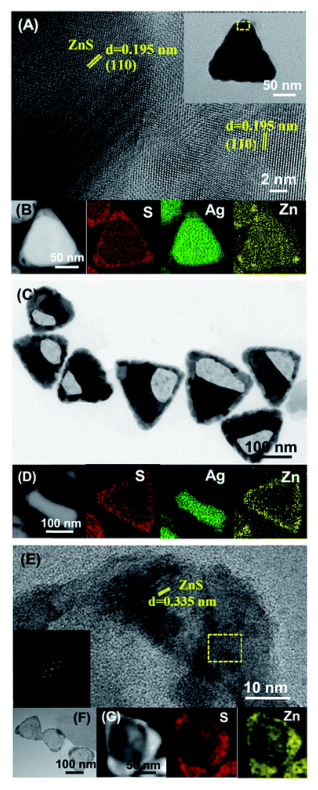

In [11]:
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

# Function to plot a sample image with labels
def plot_sample_image(image_path, label_path, class_id_mapping):
    image = Image.open(image_path)
    draw = ImageDraw.Draw(image)

    with open(label_path, 'r') as file:
        labels = file.readlines()

    for label in labels:
        class_id, x_center, y_center, width, height = map(float, label.strip().split())
        x_center *= image.width
        y_center *= image.height
        width *= image.width
        height *= image.height
        x_min = x_center - width / 2
        y_min = y_center - height / 2
        x_max = x_center + width / 2
        y_max = y_center + height / 2
        class_name = list(class_id_mapping.keys())[list(class_id_mapping.values()).index(int(class_id))]
        draw.rectangle([x_min, y_min, x_max, y_max], outline="red", width=2)
        draw.text((x_min, y_min), class_name, fill="red")

    plt.figure(figsize=(10, 10))
    plt.imshow(image)
    plt.axis('off')
    plt.show()

# Plot a sample image from the train set#/content/dataset/labels/train/C9TA00925F_fig7.txt
sample_image_path = 'dataset/images/train/C9TA00925F_fig7.png'
sample_label_path = 'dataset/labels/train/C9TA00925F_fig7.txt'
plot_sample_image(sample_image_path, sample_label_path, class_id_mapping)

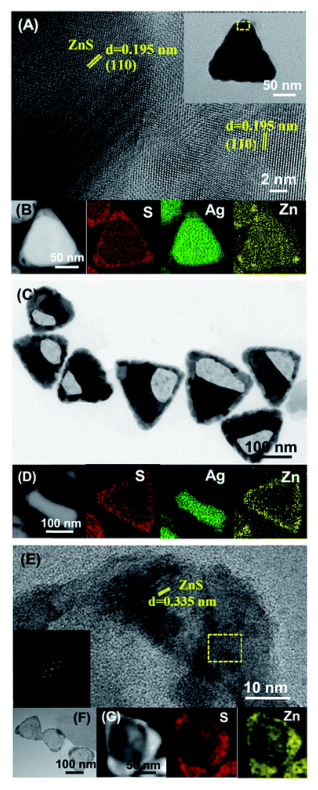

In [12]:
%matplotlib inline
plot_sample_image(sample_image_path, sample_label_path, class_id_mapping)

In [ ]:
%cd /content/datasetOld/images/train

/content/datasetOld/images/train


In [ ]:
!ls -1 | wc -l

677


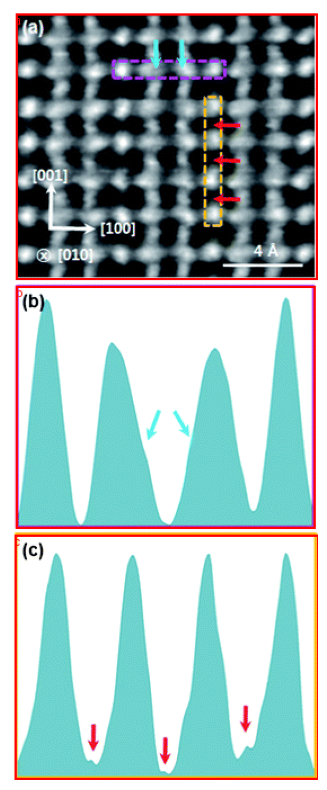

In [13]:
sample_image_path = 'dataset/images/train/C2TC00352J_fig3.png'
sample_label_path = 'dataset/labels/train/C2TC00352J_fig3.txt'
plot_sample_image(sample_image_path, sample_label_path, class_id_mapping)


# Rest of the models

In [ ]:
import torch
import torch.nn as nn
from torchvision import models

class Darknet53(nn.Module):
    def __init__(self):
        super(Darknet53, self).__init__()
        # Load a pre-trained Darknet-53 model
        self.darknet53 = models.resnet50(pretrained=True)  # Placeholder for Darknet-53, use a ResNet-50 for demonstration

    def forward(self, x):
        x = self.darknet53(x)
        return x

class FeaturePyramidNetwork(nn.Module):
    def __init__(self, feature_channels):
        super(FeaturePyramidNetwork, self).__init__()
        self.conv1 = nn.Conv2d(feature_channels, feature_channels // 2, kernel_size=1)
        self.conv2 = nn.Conv2d(feature_channels // 2, feature_channels, kernel_size=3, padding=1)

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        return x

class BoundingBoxPrediction(nn.Module):
    def __init__(self, feature_channels):
        super(BoundingBoxPrediction, self).__init__()
        self.conv = nn.Conv2d(feature_channels, 4, kernel_size=1)  # Predict 4 coordinates

    def forward(self, x):
        x = self.conv(x)
        return x

class ClassificationHead(nn.Module):
    def __init__(self, num_classes):
        super(ClassificationHead, self).__init__()
        self.resnet152 = models.resnet152(pretrained=True)
        self.resnet152.fc = nn.Linear(self.resnet152.fc.in_features, num_classes)

    def forward(self, x):
        x = self.resnet152(x)
        return x

class CombinedModel(nn.Module):
    def __init__(self, num_classes):
        super(CombinedModel, self).__init__()
        self.darknet53 = Darknet53()
        self.fpn = FeaturePyramidNetwork(2048)  # Assuming feature channel size is 2048
        self.bbox_pred = BoundingBoxPrediction(2048)
        self.class_head = ClassificationHead(num_classes)

    def forward(self, x):
        features = self.darknet53(x)
        features = self.fpn(features)
        bbox = self.bbox_pred(features)
        classification = self.class_head(features)
        return bbox, classification

# Define the number of classes
num_classes = 7  # Adjust based on your dataset
model = CombinedModel(num_classes)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 118MB/s]
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed i

In [ ]:
import os
from PIL import Image
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms

class CustomDataset(Dataset):
    def __init__(self, images_dir, labels_dir, transform=None):
        self.images_dir = images_dir
        self.labels_dir = labels_dir
        self.transform = transform
        self.image_files = [f for f in os.listdir(images_dir) if os.path.isfile(os.path.join(images_dir, f))]

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        img_name = os.path.join(self.images_dir, self.image_files[idx])
        image = Image.open(img_name).convert("RGB")

        label_name = os.path.join(self.labels_dir, self.image_files[idx].replace('.png', '.txt'))
        with open(label_name, 'r') as f:
            labels = f.readlines()

        bbox_labels = []
        class_labels = []
        for label in labels:
            class_id, x_center, y_center, width, height = map(float, label.strip().split())
            bbox_labels.append([x_center, y_center, width, height])
            class_labels.append(int(class_id))

        if self.transform:
            image = self.transform(image)

        bbox_labels = torch.tensor(bbox_labels)
        class_labels = torch.tensor(class_labels)

        return image, bbox_labels, class_labels

def custom_collate_fn(batch):
    images = [item[0] for item in batch]
    bbox_labels = [item[1] for item in batch]
    class_labels = [item[2] for item in batch]

    images = torch.stack(images, dim=0)

    max_num_bboxes = max([len(bbox) for bbox in bbox_labels])
    if max_num_bboxes > 0:
        padded_bbox_labels = torch.zeros((len(bbox_labels), max_num_bboxes, 4))
        padded_class_labels = torch.zeros((len(class_labels), max_num_bboxes), dtype=torch.int64)

        for i in range(len(bbox_labels)):
            if len(bbox_labels[i]) > 0:
                padded_bbox_labels[i, :len(bbox_labels[i]), :] = bbox_labels[i]
                padded_class_labels[i, :len(class_labels[i])] = class_labels[i]
    else:
        padded_bbox_labels = torch.zeros((len(bbox_labels), 1, 4))
        padded_class_labels = torch.zeros((len(class_labels), 1), dtype=torch.int64)

    return images, padded_bbox_labels, padded_class_labels

# Define transformations
transform = transforms.Compose([
    transforms.Resize((256, 256)),  # Resize to a fixed size
    transforms.ToTensor(),  # Convert to tensor
])

# Create dataset and data loaders
train_dataset = CustomDataset('dataset/images/train', 'dataset/labels/train', transform=transform)
test_dataset = CustomDataset('dataset/images/test', 'dataset/labels/test', transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=4, collate_fn=custom_collate_fn)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=4, collate_fn=custom_collate_fn)


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [ ]:
for images, bbox_labels, class_labels in train_loader:
  print(images.shape, bbox_labels.shape, class_labels.shape)
  break

torch.Size([32, 3, 256, 256]) torch.Size([32, 10, 4]) torch.Size([32, 10])


In [ ]:
import torch
import torch.nn as nn
from torchvision import models

class Darknet53(nn.Module):
    def __init__(self):
        super(Darknet53, self).__init__()
        # Load a pre-trained ResNet-50 model as a placeholder for Darknet-53
        self.darknet53 = models.resnet50(pretrained=True)

        # Remove the fully connected layer
        self.darknet53 = nn.Sequential(*list(self.darknet53.children())[:-2])

    def forward(self, x):
        x = self.darknet53(x)
        return x

class FeaturePyramidNetwork(nn.Module):
    def __init__(self, feature_channels):
        super(FeaturePyramidNetwork, self).__init__()
        self.conv1 = nn.Conv2d(feature_channels, feature_channels // 2, kernel_size=1)
        self.conv2 = nn.Conv2d(feature_channels // 2, feature_channels, kernel_size=3, padding=1)

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        return x

class BoundingBoxPrediction(nn.Module):
    def __init__(self, feature_channels):
        super(BoundingBoxPrediction, self).__init__()
        self.conv = nn.Conv2d(feature_channels, 4, kernel_size=1)  # Predict 4 coordinates

    def forward(self, x):
        x = self.conv(x)
        # Flatten the predictions for loss calculation
        batch_size, _, height, width = x.shape
        x = x.permute(0, 2, 3, 1).contiguous().view(batch_size, -1, 4)
        return x

class ClassificationHead(nn.Module):
    def __init__(self, num_classes):
        super(ClassificationHead, self).__init__()
        self.conv = nn.Conv2d(2048, num_classes, kernel_size=1)  # Predict class scores for each bounding box

    def forward(self, x):
        x = self.conv(x)
        batch_size, num_classes, height, width = x.shape
        x = x.permute(0, 2, 3, 1).contiguous().view(batch_size, -1, num_classes)
        return x

class CombinedModel(nn.Module):
    def __init__(self, num_classes):
        super(CombinedModel, self).__init__()
        self.darknet53 = Darknet53()
        self.fpn = FeaturePyramidNetwork(2048)  # Assuming feature channel size is 2048
        self.bbox_pred = BoundingBoxPrediction(2048)
        self.class_head = ClassificationHead(num_classes)

    def forward(self, x):
        features = self.darknet53(x)
        features = self.fpn(features)
        bbox = self.bbox_pred(features)
        classification = self.class_head(features)
        return bbox, classification

# Define the number of classes
num_classes = 7  # Adjust based on your dataset
model = CombinedModel(num_classes)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
import torch.optim as optim

# Custom loss function
def bbox_loss_fn(pred, target):
    pred = pred.view(-1, 4)
    target = target.view(-1, 4)
    return nn.MSELoss()(pred, target)

# Define classification loss function
classification_loss_fn = nn.CrossEntropyLoss()

# Define optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Learning rate scheduler
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10000, gamma=0.1)

# Training loop
num_epochs = 50  # Adjust as necessary
for epoch in range(num_epochs):
    model.train()
    for images, bbox_labels, class_labels in train_loader:
        optimizer.zero_grad()
        bbox_pred, class_pred = model(images)

        bbox_pred = bbox_pred.view(bbox_pred.size(0), -1, 4)  # Ensure correct shape
        bbox_loss = bbox_loss_fn(bbox_pred, bbox_labels)

        class_pred = class_pred.view(class_pred.size(0), -1, class_pred.size(-1))  # Ensure correct shape
        class_loss = classification_loss_fn(class_pred.permute(0, 2, 1), class_labels)

        loss = bbox_loss + class_loss
        loss.backward()
        optimizer.step()
    scheduler.step()
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}")



/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([288, 4])) that is different to the input size (torch.Size([2048, 4])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


RuntimeError: The size of tensor a (2048) must match the size of tensor b (288) at non-singleton dimension 0

In [ ]:
from sklearn.metrics import average_precision_score

def evaluate_model(model, test_loader):
    model.eval()
    all_labels = []
    all_preds = []
    with torch.no_grad():
        for images, bbox_labels, class_labels in test_loader:
            bbox_pred, class_pred = model(images)
            all_labels.extend(class_labels.numpy())
            all_preds.extend(class_pred.numpy())
    ap = average_precision_score(all_labels, all_preds, average='macro')
    print(f"Average Precision: {ap}")

# Evaluate the model
evaluate_model(model, test_loader)


KeyboardInterrupt: 

In [ ]:
from PIL import ImageDraw, ImageFont
import random

def generate_synthetic_image(base_image, labels):
    image = base_image.copy()
    draw = ImageDraw.Draw(image)
    font = ImageFont.load_default()
    for label in labels:
        x, y, w, h = label
        random_letter = random.choice(['a', 'b', 'c', 'd', 'e', 'f', 'g'])
        draw.text((x, y), random_letter, font=font, fill="white")
    return image

# Example usage
synthetic_images = []
for image, labels in real_images_with_labels:  # Assuming real_images_with_labels is defined
    synthetic_image = generate_synthetic_image(image, labels)
    synthetic_images.append(synthetic_image)


In [ ]:
import torch
import torch.nn as nn
from torchvision import models

class FeatureExtractor(nn.Module):
    def __init__(self):
        super(FeatureExtractor, self).__init__()
        # Using ResNet-50 as a placeholder for Darknet-53
        self.resnet = models.resnet50(pretrained=True)
        self.feature_extractor = nn.Sequential(*list(self.resnet.children())[:-2])

    def forward(self, x):
        return self.feature_extractor(x)

class BoundingBoxPredictor(nn.Module):
    def __init__(self, in_channels, num_anchors=9):
        super(BoundingBoxPredictor, self).__init__()
        self.conv = nn.Conv2d(in_channels, num_anchors * 5, kernel_size=1)  # 4 for bbox + 1 for confidence

    def forward(self, x):
        return self.conv(x)

class ClassificationHead(nn.Module):
    def __init__(self, num_classes):
        super(ClassificationHead, self).__init__()
        self.fc = nn.Linear(2048, num_classes)  # Assuming feature size of 2048

    def forward(self, x):
        return self.fc(x)

class SubfigureDetector(nn.Module):
    def __init__(self, in_channels, num_anchors=9):
        super(SubfigureDetector, self).__init__()
        self.conv = nn.Conv2d(in_channels, num_anchors * 4, kernel_size=1)  # Predict 4 coordinates for each anchor

    def forward(self, x):
        return self.conv(x)


In [ ]:
class CombinedModel(nn.Module):
    def __init__(self, num_classes, num_anchors=9):
        super(CombinedModel, self).__init__()
        self.feature_extractor = FeatureExtractor()
        self.bbox_predictor = BoundingBoxPredictor(2048, num_anchors)
        self.classifier = ClassificationHead(num_classes)
        self.subfigure_detector = SubfigureDetector(2048, num_anchors)

    def forward(self, x):
        features = self.feature_extractor(x)
        bbox_conf = self.bbox_predictor(features)

        batch_size, _, height, width = bbox_conf.shape
        bbox_conf = bbox_conf.permute(0, 2, 3, 1).contiguous().view(batch_size, -1, 5)
        bboxes = bbox_conf[..., :4]
        confidences = bbox_conf[..., 4]

        # Reshape the features to have the expected dimension for the classifier
        # We need to pool or flatten the spatial dimensions (height, width)
        # For example, using adaptive average pooling:
        features = F.adaptive_avg_pool2d(features, (1, 1)).view(batch_size, -1)

        classifications = self.classifier(features)

        subfigure_bboxes = self.subfigure_detector(features)
        subfigure_bboxes = subfigure_bboxes.permute(0, 2, 3, 1).contiguous().view(batch_size, -1, 4)

        return bboxes, confidences, classifications, subfigure_bboxes

In [ ]:
model = CombinedModel(num_classes)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
import torch.optim as optim
import torch.nn.functional as F

def bbox_loss_fn(pred, target):
    return F.mse_loss(pred, target)

def confidence_loss_fn(pred, target):
    return F.binary_cross_entropy(pred, target)

def classification_loss_fn(pred, target):
    return F.cross_entropy(pred, target)

# Define optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Learning rate scheduler
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10000, gamma=0.1)

# Training loop
num_epochs = 50  # Adjust as necessary
lambda_confidence = 1.0  # Adjust lambda as necessary

for epoch in range(num_epochs):
    model.train()
    for images, bbox_labels, class_labels in train_loader:
        optimizer.zero_grad()
        bboxes, confidences, classifications, subfigure_bboxes = model(images)

        # Ensure the shapes match
        batch_size, num_bboxes, _ = bboxes.shape
        bbox_labels = bbox_labels[:, :num_bboxes, :]  # Match the number of predicted bounding boxes
        class_labels = class_labels[:, :num_bboxes]  # Match the number of class labels

        bbox_loss = bbox_loss_fn(bboxes.view(-1, 4), bbox_labels.view(-1, 4))
        confidence_loss = confidence_loss_fn(confidences.view(-1), (bbox_labels.view(-1, 4).sum(dim=-1) > 0).float().view(-1))
        class_loss = classification_loss_fn(classifications, class_labels.view(-1))

        loss = bbox_loss + lambda_confidence * confidence_loss + class_loss
        loss.backward()
        optimizer.step()
    scheduler.step()
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}")

# Evaluate the model
evaluate_model(model, test_loader)


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [ ]:
import torch
from pathlib import Path

# Define the dataset and model configuration
data_config = {
    'train': 'dataset/images/train',
    'val': 'dataset/images/val',
    'nc': 1,  # number of classes (subfigures)
    'names': ['subfigure']
}

# Save the dataset configuration to a file
with open('dataset.yaml', 'w') as f:
    for key, value in data_config.items():
        f.write(f'{key}: {value}\n')

# Load the model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

# Set model parameters
model.data = 'dataset.yaml'  # dataset.yaml path
model.epochs = 50            # number of epochs
model.batch_size = 8         # batch size
model.imgsz = 640            # image size

# Train the model
model.train()

# Save the trained model
model.save(Path('best.pt'))


In [ ]:
# Clone the YOLOv5 repository
!git clone https://github.com/ultralytics/yolov5.git
%cd yolov5
!pip install -r requirements.txt


In [ ]:
import torch
import torch.nn as nn
from pathlib import Path
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import os
from PIL import Image
import json

# Custom Dataset Class
class CustomDataset(Dataset):
    def __init__(self, images_dir, labels_dir, transform=None):
        self.images_dir = images_dir
        self.labels_dir = labels_dir
        self.transform = transform
        self.image_files = [f for f in os.listdir(images_dir) if os.path.isfile(os.path.join(images_dir, f))]

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        img_name = os.path.join(self.images_dir, self.image_files[idx])
        image = Image.open(img_name).convert("RGB")

        label_name = os.path.join(self.labels_dir, self.image_files[idx].replace('.png', '.txt').replace('.jpg', '.txt'))
        with open(label_name, 'r') as f:
            labels = f.readlines()

        bbox_labels = []
        class_labels = []
        for label in labels:
            class_id, x_center, y_center, width, height = map(float, label.strip().split())
            bbox_labels.append([x_center, y_center, width, height])
            class_labels.append(int(class_id))

        if self.transform:
            image = self.transform(image)

        bbox_labels = torch.tensor(bbox_labels)
        class_labels = torch.tensor(class_labels)

        return image, bbox_labels, class_labels

# Paths to your datasets
images_dir = 'dataset/images/train'
labels_dir = 'dataset/labels/train'

# Define transformations
transform = transforms.Compose([
    transforms.Resize((640, 640)),  # Resize to a fixed size
    transforms.ToTensor(),  # Convert to tensor
])

# Create dataset and data loaders
train_dataset = CustomDataset(images_dir, labels_dir, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True, num_workers=4, collate_fn=lambda x: list(zip(*x)))


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [ ]:
# Load YOLOv5 model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-7-25 Python-3.10.12 torch-2.3.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [ ]:
class BoundingBoxPredictor(nn.Module):
    def __init__(self, in_channels, num_anchors=9):
        super(BoundingBoxPredictor, self).__init__()
        self.conv = nn.Conv2d(in_channels, num_anchors * 5, kernel_size=1)  # 4 for bbox + 1 for confidence

    def forward(self, x):
        return self.conv(x)

class ClassificationHead(nn.Module):
    def __init__(self, num_classes, in_channels=256):
        super(ClassificationHead, self).__init__()
        self.conv = nn.Conv2d(in_channels, num_classes, kernel_size=1)

    def forward(self, x):
        return self.conv(x)


In [ ]:
class CombinedModel(nn.Module):
    def __init__(self, num_classes, num_anchors=9):
        super(CombinedModel, self).__init__()
        self.yolov5_backbone = model.model.model[-1]  # YOLOv5 backbone
        self.bbox_predictor = BoundingBoxPredictor(256, num_anchors)
        self.classifier = ClassificationHead(num_classes, in_channels=256)
        self.subfigure_detector = BoundingBoxPredictor(256, num_anchors)

    def forward(self, x):
        features = self.yolov5_backbone(x)

        bbox_conf = self.bbox_predictor(features)
        class_pred = self.classifier(features)

        batch_size, _, height, width = bbox_conf.shape
        bbox_conf = bbox_conf.permute(0, 2, 3, 1).contiguous().view(batch_size, -1, 5)
        bboxes = bbox_conf[..., :4]
        confidences = bbox_conf[..., 4]

        class_pred = class_pred.permute(0, 2, 3, 1).contiguous().view(batch_size, -1, num_classes)

        # Subfigure Detection using Layout Information
        binary_mask = (class_pred.max(dim=-1)[0] > 0.5).float()  # Create a binary mask
        features_with_mask = torch.cat([features, binary_mask.unsqueeze(1)], dim=1)  # Add mask as an extra feature

        subfigure_bboxes = self.subfigure_detector(features_with_mask)
        subfigure_bboxes = subfigure_bboxes.permute(0, 2, 3, 1).contiguous().view(batch_size, -1, 4)

        return bboxes, confidences, class_pred, subfigure_bboxes

# Define the number of classes
num_classes = 6  # Adjust based on your dataset
custom_model = CombinedModel(num_classes)


TypeError: 'DetectionModel' object is not subscriptable

In [ ]:
# Load YOLOv5 model
# yolo_model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)


# Correct way to access the YOLOv5 backbone
class CombinedModel(nn.Module):
    def __init__(self, yolov5_model, num_classes, num_anchors=9):
        super(CombinedModel, self).__init__()
        # Extracting the backbone layers from YOLOv5
        self.yolov5_backbone = nn.Sequential(*list(yolo_model.model.model[:10]))  # Access the underlying model structure and convert it to a nn.Sequential
        self.bbox_predictor = BoundingBoxPredictor(256, num_anchors)
        self.classifier = ClassificationHead(num_classes, in_channels=256)
        self.subfigure_detector = BoundingBoxPredictor(256, num_anchors)

    # ... [rest of the code remains the same]

# Define the number of classes
num_classes = 6  # Adjust based on your dataset
custom_model = CombinedModel(yolo_model, num_classes)

TypeError: 'DetectionModel' object is not subscriptable

In [ ]:
import torch.optim as optim
import torch.nn.functional as F

def bbox_loss_fn(pred, target):
    return F.mse_loss(pred, target)

def confidence_loss_fn(pred, target):
    return F.binary_cross_entropy(pred, target)

def classification_loss_fn(pred, target):
    return F.cross_entropy(pred, target)

# Define optimizer
optimizer = optim.Adam(custom_model.parameters(), lr=0.001)

# Learning rate scheduler
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10000, gamma=0.1)

# Training loop
num_epochs = 50  # Adjust as necessary
lambda_confidence = 1.0  # Adjust lambda as necessary

for epoch in range(num_epochs):
    custom_model.train()
    for images, bbox_labels, class_labels in train_loader:
        images = torch.stack(images)
        optimizer.zero_grad()
        bboxes, confidences, class_pred, subfigure_bboxes = custom_model(images)

        # Reshape predictions and labels
        batch_size, _, height, width = bboxes.shape
        bbox_labels = bbox_labels[:, :height * width, :]
        class_labels = class_labels[:, :height * width]

        # Calculate losses
        bbox_loss = bbox_loss_fn(bboxes.view(-1, 4), bbox_labels.view(-1, 4))
        confidence_loss = confidence_loss_fn(confidences.view(-1), (bbox_labels.view(-1, 4).sum(dim=-1) > 0).float().view(-1))
        class_loss = classification_loss_fn(class_pred.view(-1, num_classes), class_labels.view(-1))

        loss = bbox_loss + lambda_confidence * confidence_loss + class_loss
        loss.backward()
        optimizer.step()
    scheduler.step()
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}")

# Evaluate the model
def evaluate_model(model, dataloader):
    model.eval()
    total_loss = 0
    with torch.no_grad():
        for images, bbox_labels, class_labels in dataloader:
            images = torch.stack(images)
            bboxes, confidences, class_pred, subfigure_bboxes = model(images)

            batch_size, _, height, width = bboxes.shape
            bbox_labels = bbox_labels[:, :height * width, :]
            class_labels = class_labels[:, :height * width]

            bbox_loss = bbox_loss_fn(bboxes.view(-1, 4), bbox_labels.view(-1, 4))
            confidence_loss = confidence_loss_fn(confidences.view(-1), (bbox_labels.view(-1, 4).sum(dim=-1) > 0).float().view(-1))
            class_loss = classification_loss_fn(class_pred.view(-1, num_classes), class_labels.view(-1))

            loss = bbox_loss + lambda_confidence * confidence_loss + class_loss
            total_loss += loss.item()
    return total_loss / len(dataloader)

# Usage
# Define validation loader similarly to train loader
val_dataset = CustomDataset('dataset/images/val', 'dataset/labels/val', transform=transform)
val_loader = DataLoader(val_dataset, batch_size=8, shuffle=False, num_workers=4, collate_fn=lambda x: list(zip(*x)))

# Evaluate model
val_loss = evaluate_model(custom_model, val_loader)
print(f"Validation Loss: {val_loss}")


NameError: name 'custom_model' is not defined